In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt   
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv("E:\MscITDataScienceAssg\water_potability.csv")

In [3]:
data.head() 

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890456,20791.31898,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.05786,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.54173,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.41744,8.059332,356.886136,363.266516,18.436525,100.341674,4.628771,0
4,9.092223,181.101509,17978.98634,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


In [4]:
data.shape

(3276, 10)

In [5]:
data.describe()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
count,2785.000000,3276.000000,3276.000000,3276.000000,2495.000000,3276.000000,3276.000000,3114.000000,3276.000000,3276.000000
mean,7.080795,196.369496,22014.092526,7.122277,333.775777,426.205111,14.284970,66.396293,3.966786,0.390110
std,1.594320,32.879761,8768.570828,1.583085,41.416840,80.824064,3.308162,16.175008,0.780382,0.487849
min,0.000000,47.432000,320.942611,0.352000,129.000000,181.483754,2.200000,0.738000,1.450000,0.000000
25%,6.093092,176.850538,15666.690300,6.127421,307.699498,365.734414,12.065801,55.844536,3.439711,0.000000
50%,7.036752,196.967627,20927.833605,7.130299,333.073546,421.884968,14.218338,66.622485,3.955028,0.000000
75%,8.062066,216.667456,27332.762125,8.114887,359.950170,481.792305,16.557652,77.337473,4.500320,1.000000
max,14.000000,323.124000,61227.196010,13.127000,481.030642,753.342620,28.300000,124.000000,6.739000,1.000000


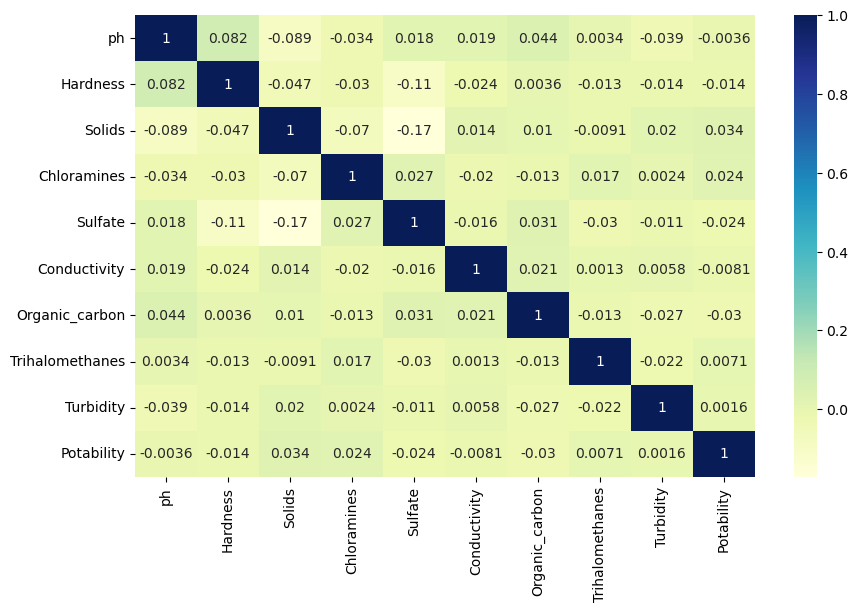

In [6]:
data_h = data.corr()
plt.figure(figsize=(10,6))
sns.heatmap(data_h , annot=True, cmap="YlGnBu")
plt.show()

In [7]:
pip install missingno

Note: you may need to restart the kernel to use updated packages.


In [8]:
import missingno as msno

<AxesSubplot:>

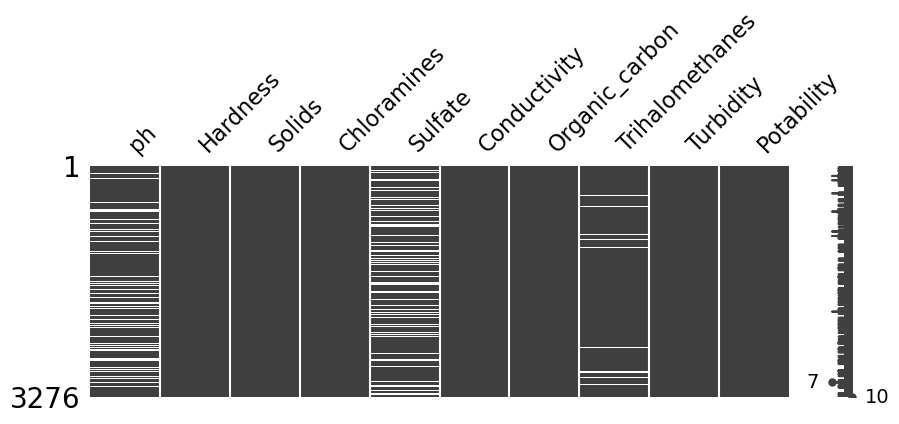

In [9]:
msno.matrix(data,figsize=(10,3))

In [10]:
data.isnull().sum()

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

In [11]:
data["ph"] = data["ph"].fillna(data["ph"].mean())

In [12]:
data["Sulfate"] = data["Sulfate"].fillna(data["Sulfate"].mean())

In [13]:
data["Trihalomethanes"] = data["Trihalomethanes"].fillna(data["Trihalomethanes"].mean())

<AxesSubplot:>

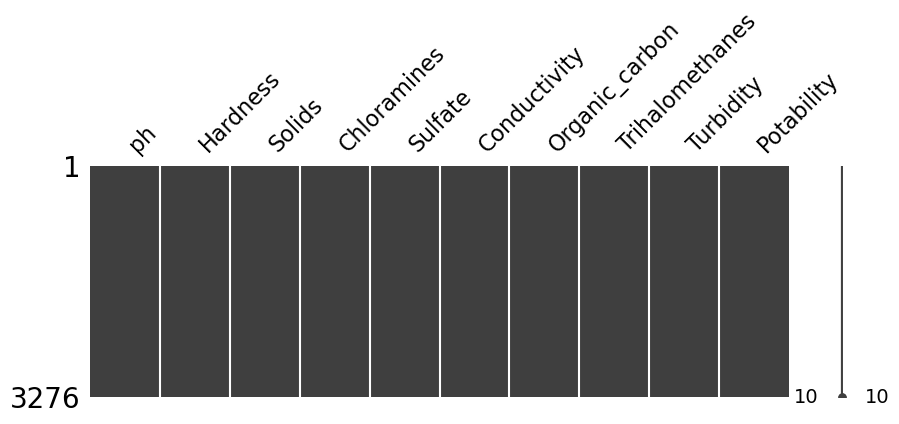

In [14]:
msno.matrix(data,figsize=(10,3))

In [15]:
print("total values count is :\n",data["Potability"].value_counts())
print("parcentage of value in :\n",data["Potability"].value_counts()/len(data))

total values count is :
 0    1998
1    1278
Name: Potability, dtype: int64
parcentage of value in :
 0    0.60989
1    0.39011
Name: Potability, dtype: float64


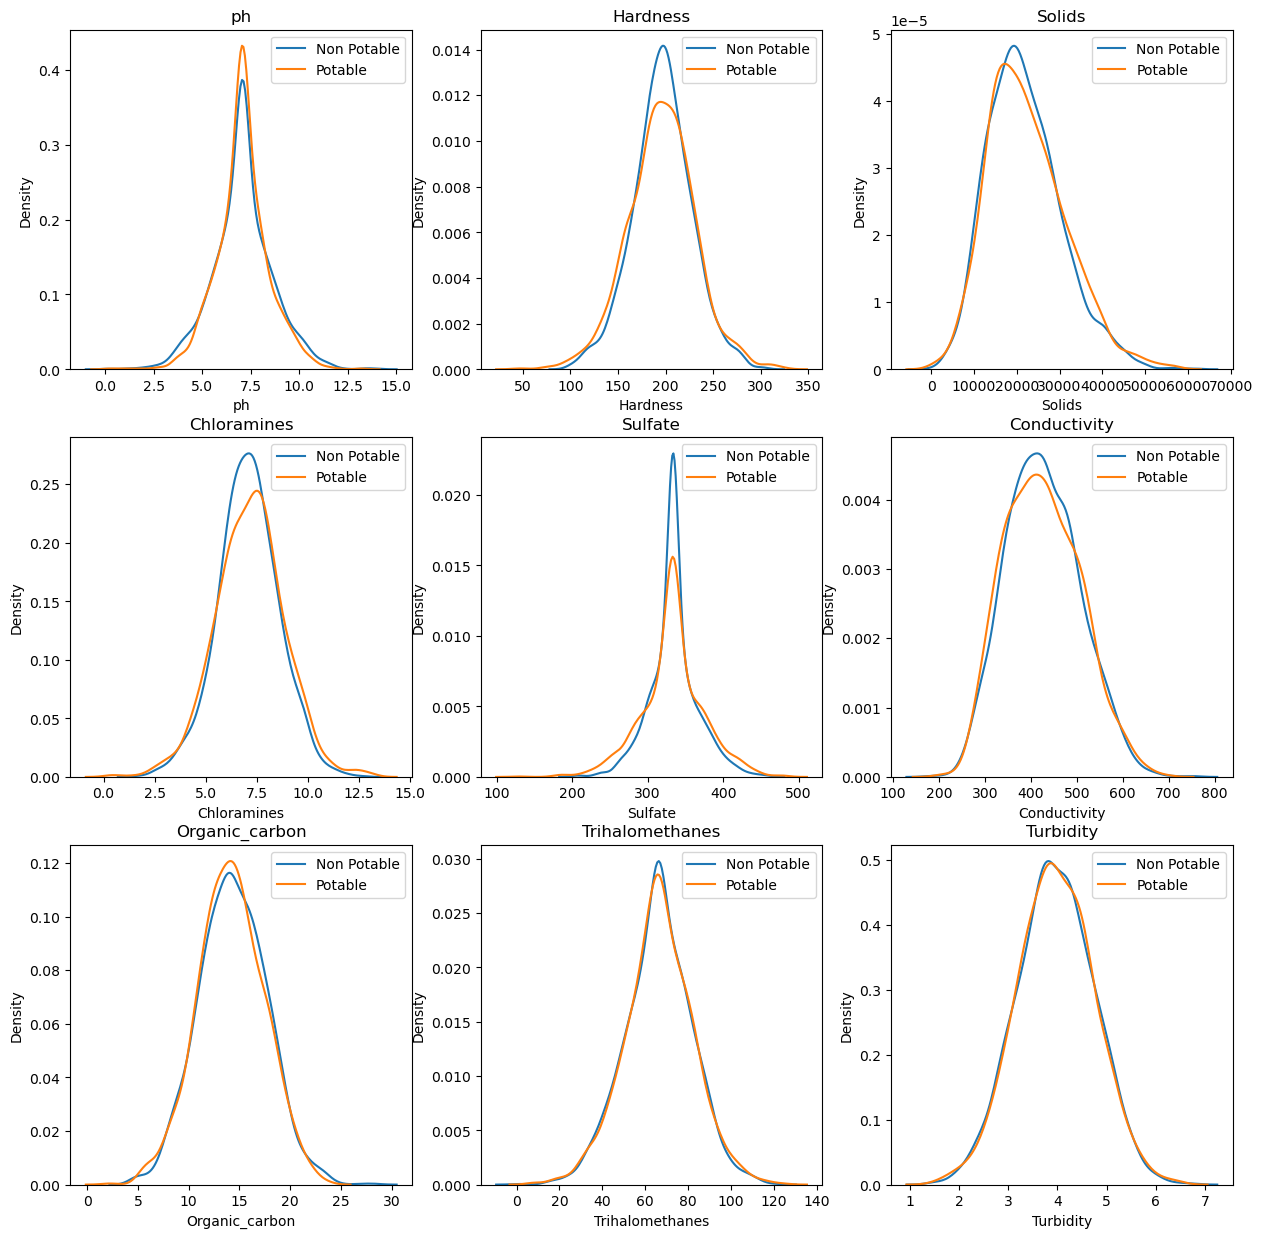

In [16]:
non_potable = data.query("Potability == 0")
potable = data.query("Potability == 1")

plt.figure(figsize = (15,15))
for water, col in enumerate(data.columns[:9]):
    plt.subplot(3,3, water+1)
    plt.title(col)
    sns.kdeplot(x = non_potable[col], label = "Non Potable")
    sns.kdeplot(x = potable[col], label = "Potable")
    plt.legend()
plt.show()

In [17]:
from ipywidgets import interact, interactive, fixed

In [18]:
flt = data.columns
flt

Index(['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity',
       'Organic_carbon', 'Trihalomethanes', 'Turbidity', 'Potability'],
      dtype='object')

In [19]:
def fun(x,y,h):
    plt.figure(figsize=(10,5))
    sns.scatterplot(x = x,y = y,hue = h,data = data)
    plt.show()

In [20]:
interact(fun,x = flt,y=flt,h=flt)

interactive(children=(Dropdown(description='x', options=('ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate',…

<function __main__.fun(x, y, h)>

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


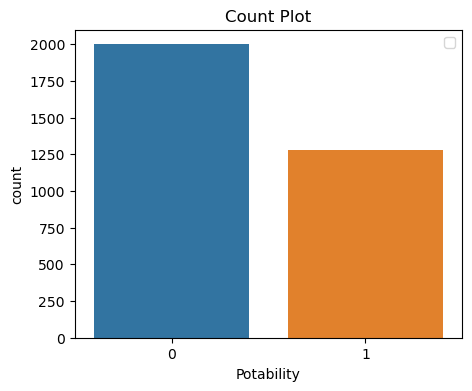

In [21]:
plt.figure(figsize=(5,4))
sns.countplot(data["Potability"])
plt.title("Count Plot")
plt.legend()
plt.show()

<AxesSubplot:xlabel='Hardness', ylabel='Count'>

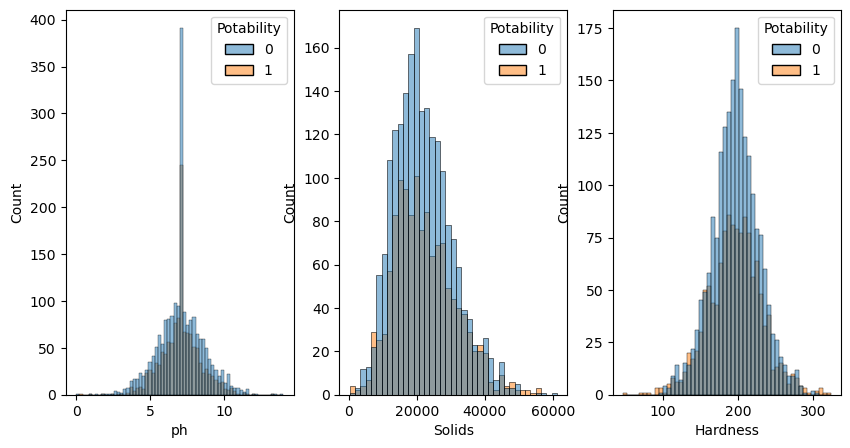

In [22]:
plt.figure(figsize =(10,5))
plt.subplot(1,3,1)
sns.histplot(x="ph",hue="Potability",data=data)
plt.subplot(1,3,2)
sns.histplot(x="Solids",hue="Potability",data=data)
plt.subplot(1,3,3)
sns.histplot(x="Hardness",hue="Potability",data=data)

In [23]:
#data.columns

In [24]:
features = ['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity',
       'Organic_carbon', 'Trihalomethanes', 'Turbidity']

In [25]:
#list(enumerate(features))

In [26]:
#plt.figure(figsize=(15,10))
#for i in enumerate(features):
    #plt.subplot(3,3,i[0]+1)#row,col i[0] means this (0, 'ph') tuple and add tuple till 8
    #sns.histplot(i[1],hue="Potability",data=data)# i[0] = 0 and i[1]=ph here we provide col name 

In [27]:
from sklearn.preprocessing import StandardScaler

In [28]:
scaler = StandardScaler()
scaler.fit(data)

StandardScaler()

In [29]:
scaler_data = scaler.transform(data)
scaler_data

array([[-1.02733269e-14,  2.59194712e-01, -1.39470871e-01, ...,
         1.30614943e+00, -1.28629758e+00, -7.99774743e-01],
       [-2.28933938e+00, -2.03641367e+00, -3.85986649e-01, ...,
        -6.38479983e-01,  6.84217891e-01, -7.99774743e-01],
       [ 6.92867789e-01,  8.47664833e-01, -2.40047337e-01, ...,
         1.50940874e-03, -1.16736546e+00, -7.99774743e-01],
       ...,
       [ 1.59125368e+00, -6.26829230e-01,  1.27080989e+00, ...,
         2.18748247e-01, -8.56006782e-01,  1.25035206e+00],
       [-1.32951593e+00,  1.04135450e+00, -1.14405809e+00, ...,
         7.03468419e-01,  9.50797384e-01,  1.25035206e+00],
       [ 5.40150905e-01, -3.85462306e-02, -5.25811938e-01, ...,
         7.80223466e-01, -2.12445866e+00,  1.25035206e+00]])

In [30]:
scaled_features_df = pd.DataFrame(scaler_data, index=data.index, columns=data.columns)
scaled_features_df

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,-1.027333e-14,0.259195,-0.139471,0.112415,9.613574e-01,1.708954,-1.180651,1.306149e+00,-1.286298,-0.799775
1,-2.289339e+00,-2.036414,-0.385987,-0.307694,1.415694e-14,2.062575,0.270597,-6.384800e-01,0.684218,-0.799775
2,6.928678e-01,0.847665,-0.240047,1.360594,1.415694e-14,-0.094032,0.781117,1.509409e-03,-1.167365,-0.799775
3,8.409504e-01,0.547651,0.000493,0.592008,6.395190e-01,-0.778830,1.255134,2.152874e+00,0.848412,-0.799775
4,1.368569e+00,-0.464429,-0.460249,-0.363698,-6.541765e-01,-0.343939,-0.824357,-2.181599e+00,0.138786,-0.799775
...,...,...,...,...,...,...,...,...,...,...
3271,-1.641587e+00,-0.081758,2.916188,0.028027,7.242640e-01,1.240155,-0.118075,1.848120e-02,0.601124,1.250352
3272,4.953704e-01,-0.085667,-0.534295,0.593290,1.415694e-14,-0.417706,1.698560,-1.802553e-15,-1.497627,1.250352
3273,1.591254e+00,-0.626829,1.270810,0.144017,1.415694e-14,0.072263,-0.981329,2.187482e-01,-0.856007,1.250352
3274,-1.329516e+00,1.041355,-1.144058,-0.517373,1.415694e-14,-0.288597,-0.942064,7.034684e-01,0.950797,1.250352


In [31]:
pip install imblearn

Note: you may need to restart the kernel to use updated packages.


In [32]:
pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [33]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import *
from sklearn.preprocessing import *
from sklearn.model_selection import *
from imblearn.under_sampling import *
from imblearn.over_sampling import *
from imblearn.pipeline import *
from collections import Counter

In [34]:
X = data.drop('Potability', axis =1)
y = data['Potability']

In [35]:
y.value_counts() # data is imbalance

0    1998
1    1278
Name: Potability, dtype: int64

In [36]:
from imblearn.over_sampling import SMOTE

In [37]:
smote = SMOTE(random_state=42)
Xsm,ysm = smote.fit_resample(X,y)

In [38]:
ysm.value_counts()

0    1998
1    1998
Name: Potability, dtype: int64

In [39]:
X_train , X_test , y_train ,y_test = train_test_split(Xsm,ysm,test_size=0.2,random_state=1)

In [40]:
lr  = LogisticRegression(max_iter=1000)
lr.fit(X_train,y_train)

y_train_pred=lr.predict(X_train)

y_test_pred=lr.predict(X_test)


print('\ntrain:')
print(classification_report(y_train,y_train_pred))
print('test:')
print(classification_report(y_test,y_test_pred))

print("Accuracy: %.2f" %accuracy_score(y_test, y_test_pred))
print("Recall: %.2f" %recall_score(y_test, y_test_pred))
print("f1: %.2f" %f1_score(y_test, y_test_pred))
print("Precision: %.2f" %precision_score(y_test, y_test_pred))


train:
              precision    recall  f1-score   support

           0       0.51      0.59      0.55      1612
           1       0.50      0.42      0.46      1584

    accuracy                           0.51      3196
   macro avg       0.51      0.50      0.50      3196
weighted avg       0.51      0.51      0.50      3196

test:
              precision    recall  f1-score   support

           0       0.49      0.60      0.54       386
           1       0.52      0.40      0.46       414

    accuracy                           0.50       800
   macro avg       0.50      0.50      0.50       800
weighted avg       0.50      0.50      0.50       800

Accuracy: 0.50
Recall: 0.40
f1: 0.46
Precision: 0.52


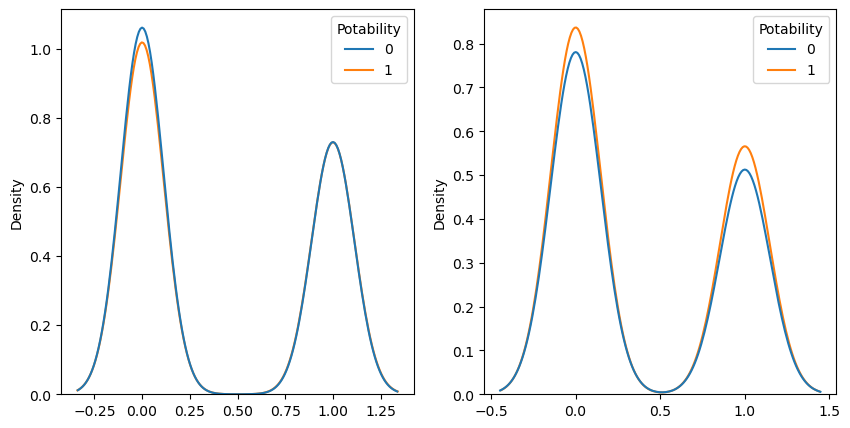

In [41]:
fig, ax =plt.subplots(1,2, figsize=(10,5)) 
plt1 = sns.kdeplot(y_train_pred, hue = y_train, ax=ax[0])
plt2 = sns.kdeplot(y_test_pred, hue = y_test, ax=ax[1])

In [42]:
from sklearn.utils import compute_class_weight
compute_class_weight(class_weight = 'balanced',classes = np.unique(y_train), y = y_train)

array([0.99131514, 1.00883838])

In [43]:
model  = make_pipeline(StandardScaler(),LogisticRegression(max_iter=1000,class_weight={0:0.9913,1:0.0088}))
model.fit(X_train,y_train)

y_train_prob = model.predict_proba(X_train)[:,1]
y_test_prob = model.predict_proba(X_test)[:,1]

y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)
print("Accuracy: %.2f" %accuracy_score(y_test, y_test_pred))
print("Recall: %.2f" %recall_score(y_test, y_test_pred))
print("f1: %.2f" %f1_score(y_test, y_test_pred))
print("Precision: %.2f" %precision_score(y_test, y_test_pred))

print('\ntrain:')
print(classification_report(y_train,y_train_pred))
print('test:')
print(classification_report(y_test,y_test_pred))

Accuracy: 0.50
Recall: 0.40
f1: 0.46
Precision: 0.52

train:
              precision    recall  f1-score   support

           0       0.51      0.59      0.55      1612
           1       0.50      0.42      0.46      1584

    accuracy                           0.51      3196
   macro avg       0.51      0.50      0.50      3196
weighted avg       0.51      0.51      0.50      3196

test:
              precision    recall  f1-score   support

           0       0.49      0.60      0.54       386
           1       0.52      0.40      0.46       414

    accuracy                           0.50       800
   macro avg       0.50      0.50      0.50       800
weighted avg       0.50      0.50      0.50       800



In [44]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_selection import SelectFromModel

In [45]:

model = make_pipeline(StandardScaler(),DecisionTreeClassifier(max_depth=14,splitter='best'))
model.fit(X_train,y_train)

y_train_prob = model.predict_proba(X_train)[:,1]
y_test_prob = model.predict_proba(X_test)[:,1]

y_pred_train = model.predict(X_train)
y_pred_testd = model.predict(X_test)


print('TRAIN PERFORMANCE')
print(classification_report(y_train,y_pred_train))
print('TEST PERFORMANCE')
print(classification_report(y_test,y_pred_testd))

print("Accuracy: %.2f" %accuracy_score(y_test, y_pred_testd))
print("Recall: %.2f" %recall_score(y_test, y_pred_testd))
print("f1: %.2f" %f1_score(y_test, y_pred_testd))
print("Precision: %.2f" %precision_score(y_test, y_pred_testd))


TRAIN PERFORMANCE
              precision    recall  f1-score   support

           0       0.76      0.83      0.79      1612
           1       0.81      0.73      0.77      1584

    accuracy                           0.78      3196
   macro avg       0.78      0.78      0.78      3196
weighted avg       0.78      0.78      0.78      3196

TEST PERFORMANCE
              precision    recall  f1-score   support

           0       0.60      0.66      0.62       386
           1       0.65      0.58      0.61       414

    accuracy                           0.62       800
   macro avg       0.62      0.62      0.62       800
weighted avg       0.62      0.62      0.62       800

Accuracy: 0.62
Recall: 0.58
f1: 0.61
Precision: 0.65


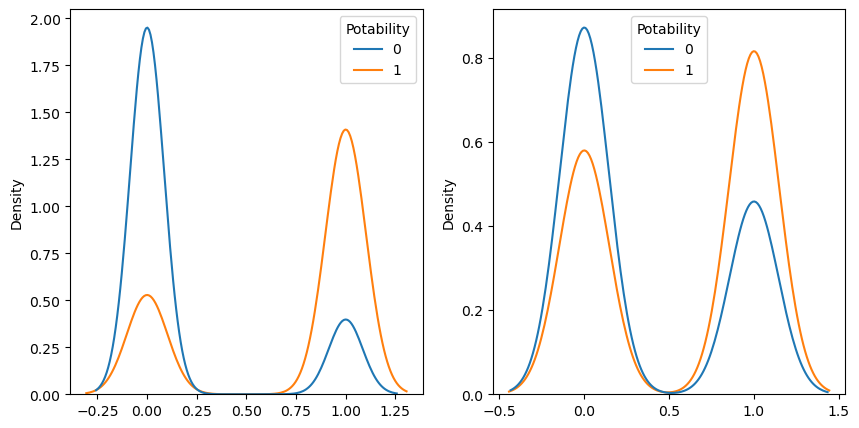

In [46]:
fig, ax =plt.subplots(1,2, figsize=(10,5)) 
plt1 = sns.kdeplot(y_pred_train, hue = y_train, ax=ax[0])
plt2 = sns.kdeplot(y_pred_testd, hue = y_test, ax=ax[1])

In [47]:
import pickle

In [48]:
pickle.dump(model,open("DTC.sav","wb"))

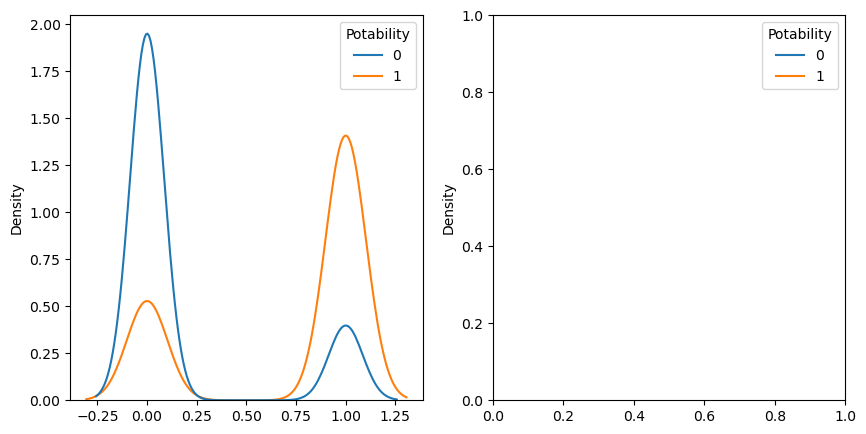

In [49]:
fig, ax =plt.subplots(1,2, figsize=(10,5))
plt1 = sns.kdeplot(y_pred_train, hue = y_train, ax=ax[0])
plt2 = sns.kdeplot(y_pred_test, hue = y_test, ax=ax[1])

In [50]:
from sklearn.ensemble import RandomForestClassifier

In [51]:
## add class weight to base model
mmodel = make_pipeline(StandardScaler(),RandomForestClassifier(criterion= 'gini',
                                                               n_estimators = 120,random_state=50))
model.fit(X_train,y_train)

y_train_prob = model.predict_proba(X_train)[:,1]
y_test_prob = model.predict_proba(X_test)[:,1]# ahe so aapan 1 var train karun mg tyala predict krnar

y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

y_pred_test = model.predict(X_test)

print('TRAIN PERFORMANCE')
print(classification_report(y_train,y_pred_train))
print('TEST PERFORMANCE')
print(classification_report(y_test,y_pred_test))

print("Accuracy: %.2f" %accuracy_score(y_test, y_pred_test))
print("Recall: %.2f" %recall_score(y_test, y_pred_test))
print("f1: %.2f" %f1_score(y_test, y_pred_test))
print("Precision: %.2f" %precision_score(y_test, y_pred_test))


TRAIN PERFORMANCE
              precision    recall  f1-score   support

           0       0.76      0.83      0.79      1612
           1       0.81      0.73      0.77      1584

    accuracy                           0.78      3196
   macro avg       0.78      0.78      0.78      3196
weighted avg       0.78      0.78      0.78      3196

TEST PERFORMANCE
              precision    recall  f1-score   support

           0       0.59      0.66      0.62       386
           1       0.64      0.58      0.61       414

    accuracy                           0.62       800
   macro avg       0.62      0.62      0.62       800
weighted avg       0.62      0.62      0.62       800

Accuracy: 0.62
Recall: 0.58
f1: 0.61
Precision: 0.64


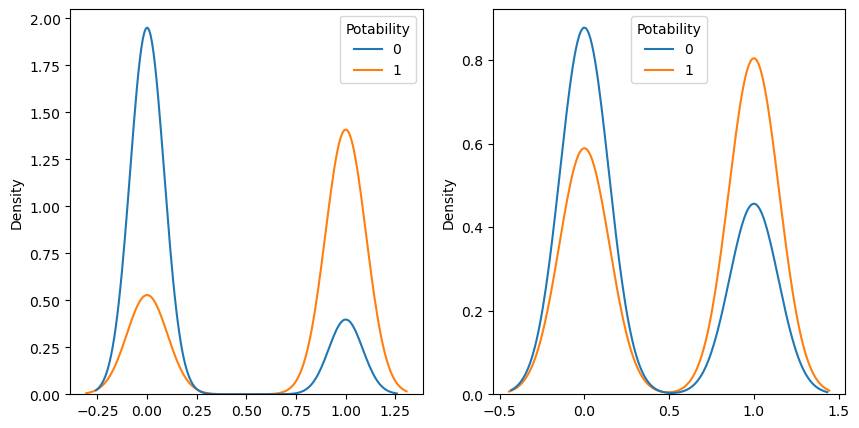

In [52]:
fig, ax =plt.subplots(1,2, figsize=(10,5))
plt1 = sns.kdeplot(y_pred_train, hue = y_train, ax=ax[0])
plt2 = sns.kdeplot(y_pred_test, hue = y_test, ax=ax[1])